In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
pwd

'D:\\ALL_CODES_SECTIONWISE\\DSC_CODES\\Data_Science_ML_Based'

In [4]:
df = pd.read_csv("D:\\ALL_CODES_SECTIONWISE\\DSC_CODES\\Data_Science_ML_Based\\DATA\\gene_expression.csv")

In [5]:
df.head()

Gene One  Gene Two  Cancer Present
0       4.3       3.9               1
1       2.5       6.3               0
2       5.7       3.9               1
3       6.1       6.2               0
4       7.4       3.4               1

<AxesSubplot:>

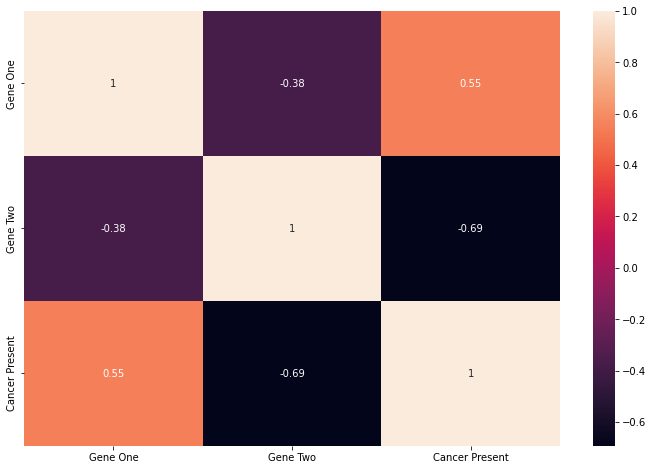

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

<Figure size 864x576 with 0 Axes>

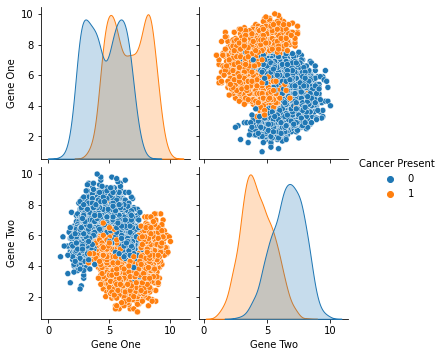

In [7]:
plt.figure(figsize=(12,8))
sns.pairplot(data=df, hue='Cancer Present')

<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

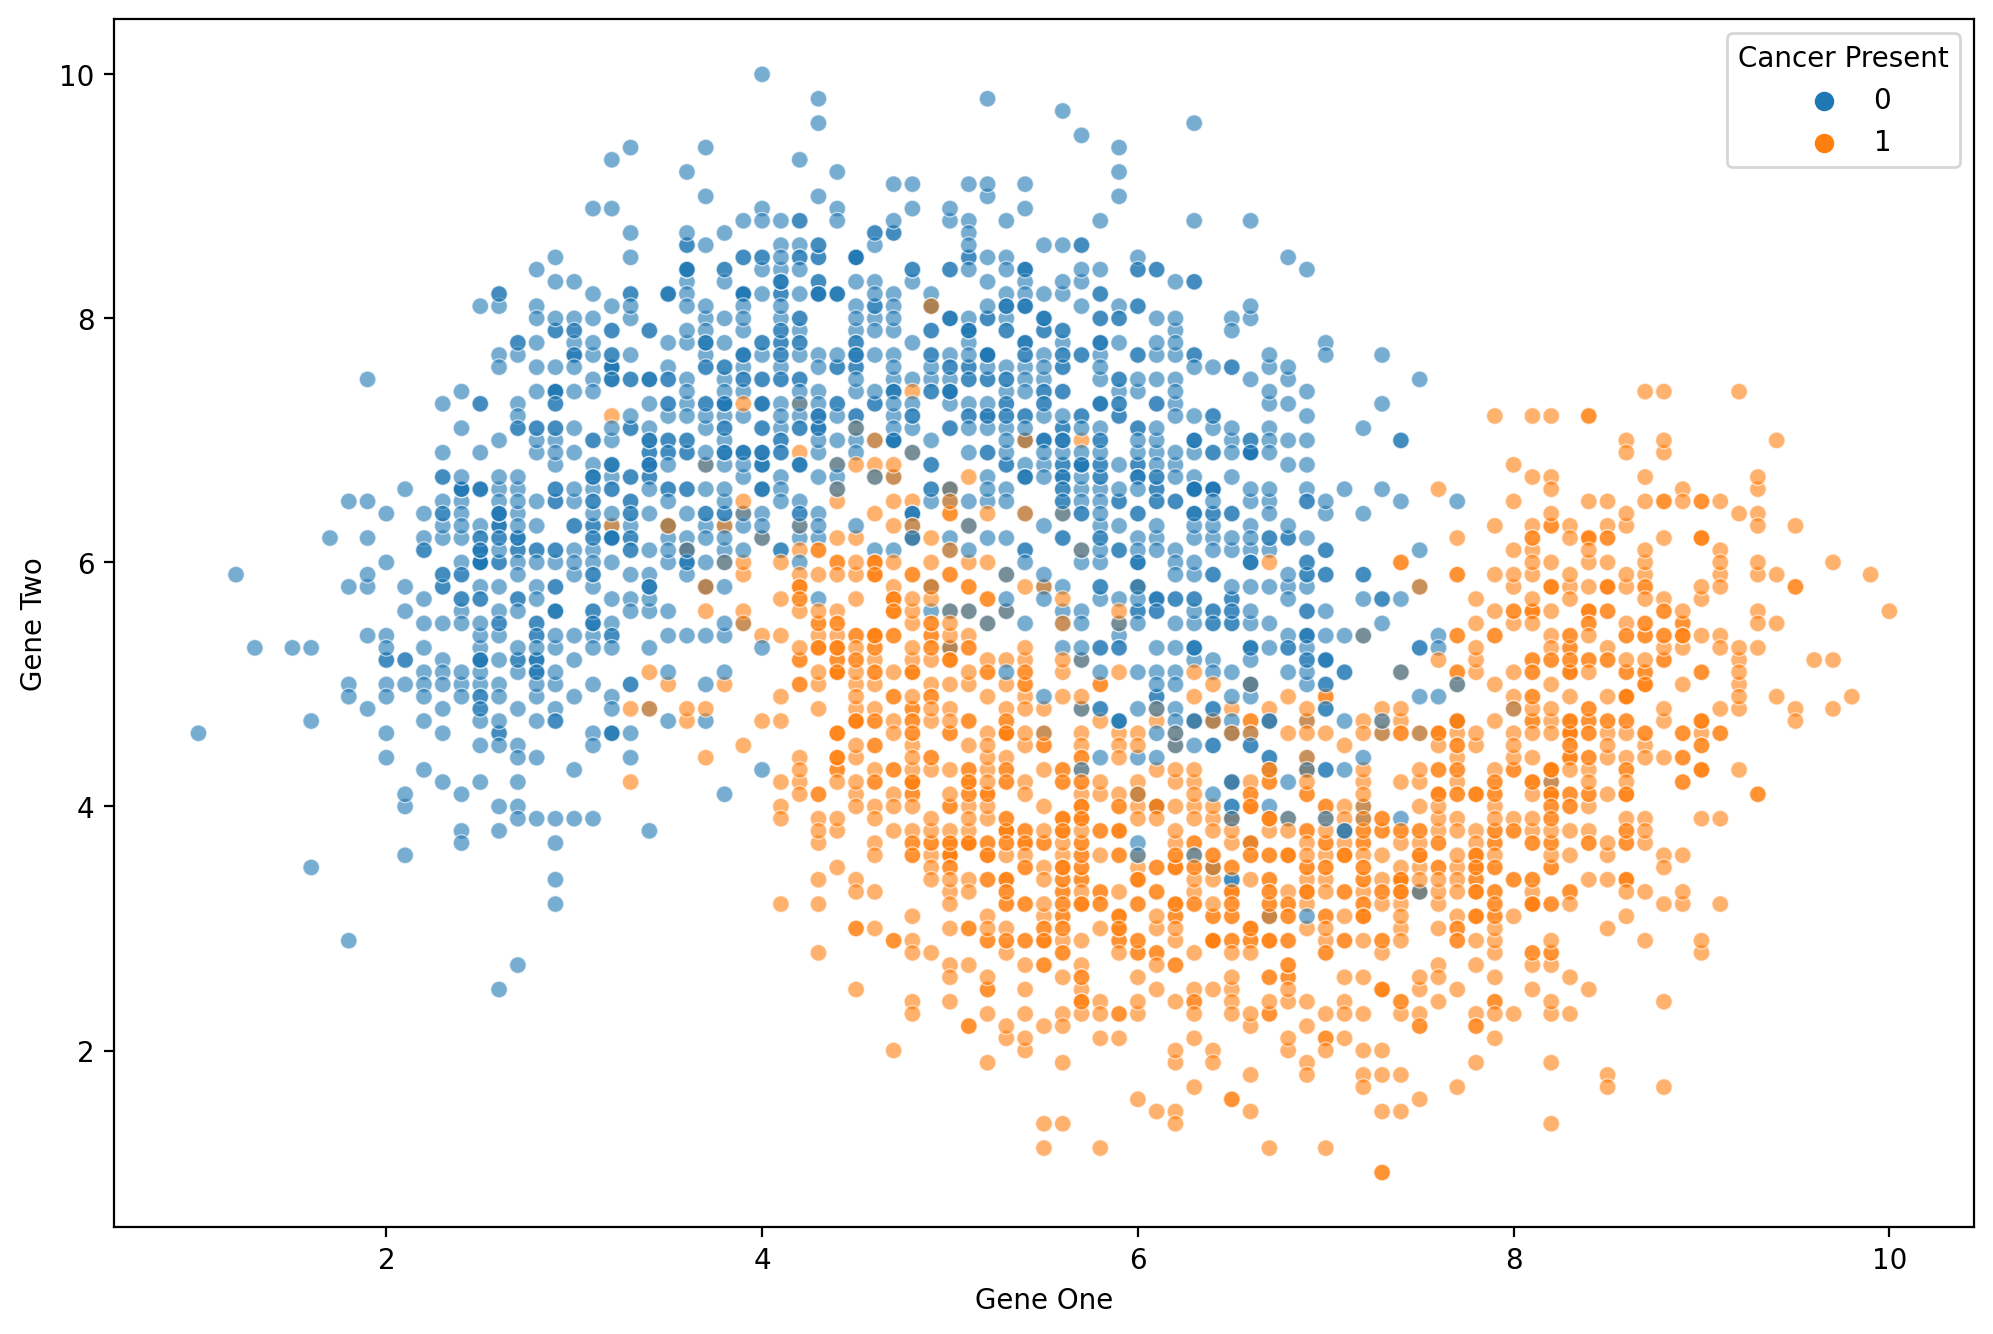

In [8]:
plt.figure(figsize=(12,8) , dpi=200)
sns.scatterplot(data=df, x= df.columns[0] , y=df.columns[1]   , hue='Cancer Present' , alpha=0.6)

<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

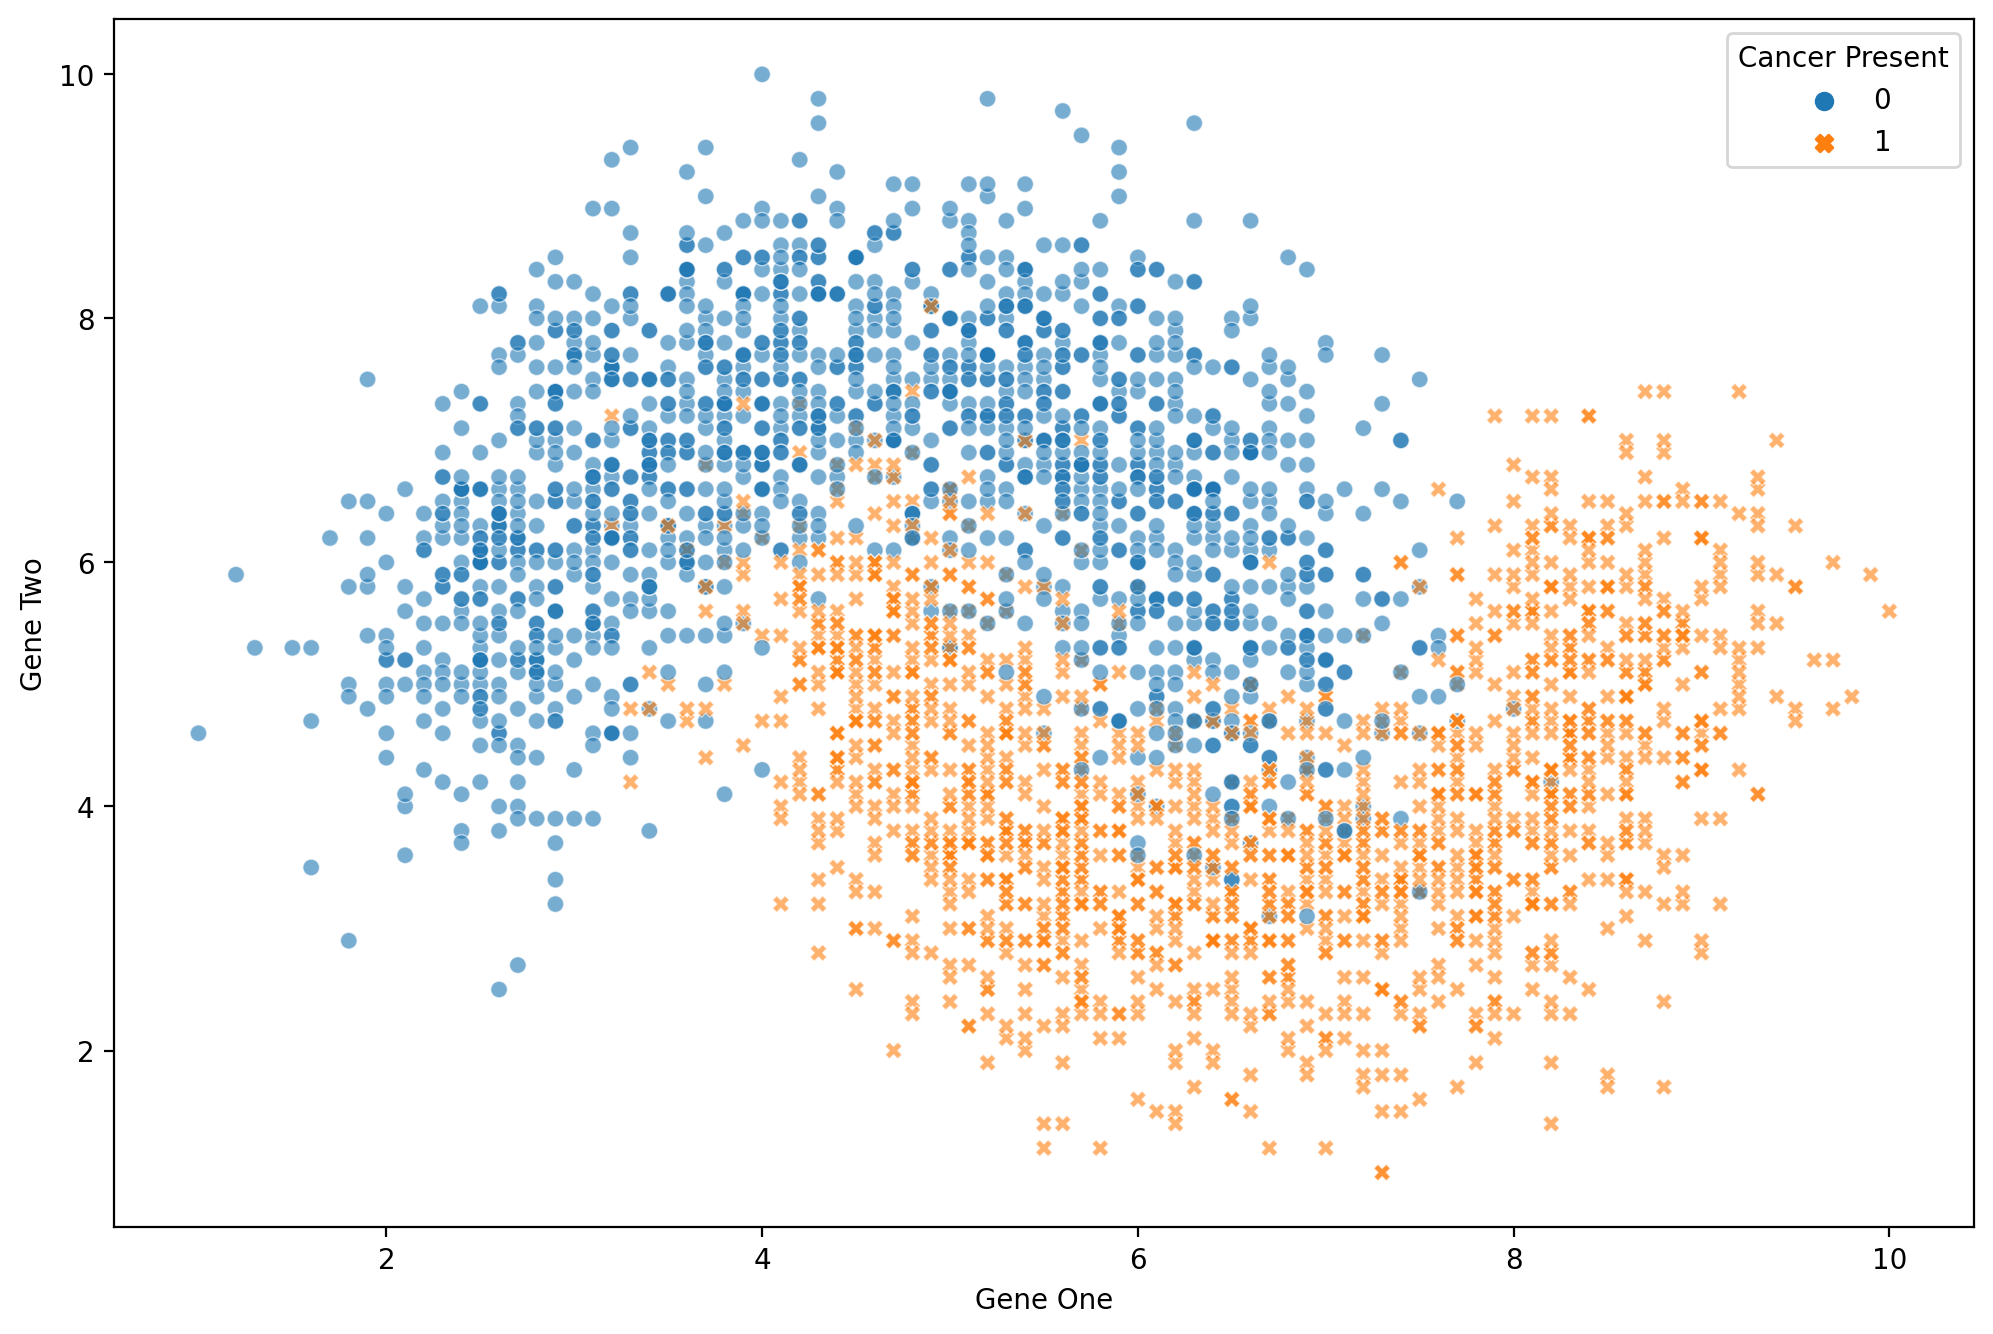

In [9]:
plt.figure(figsize=(12,8) , dpi=200)
sns.scatterplot(data=df, x= df.columns[0] , y=df.columns[1]   , hue='Cancer Present'  ,style='Cancer Present' , alpha=0.6)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
X = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
scaler = StandardScaler()

In [14]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer ne

In [17]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [18]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

# Understanding KNN and Choosing K Value

In [19]:
full_test = pd.concat([X_test,y_test],axis=1)

In [20]:
len(full_test)

900

<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

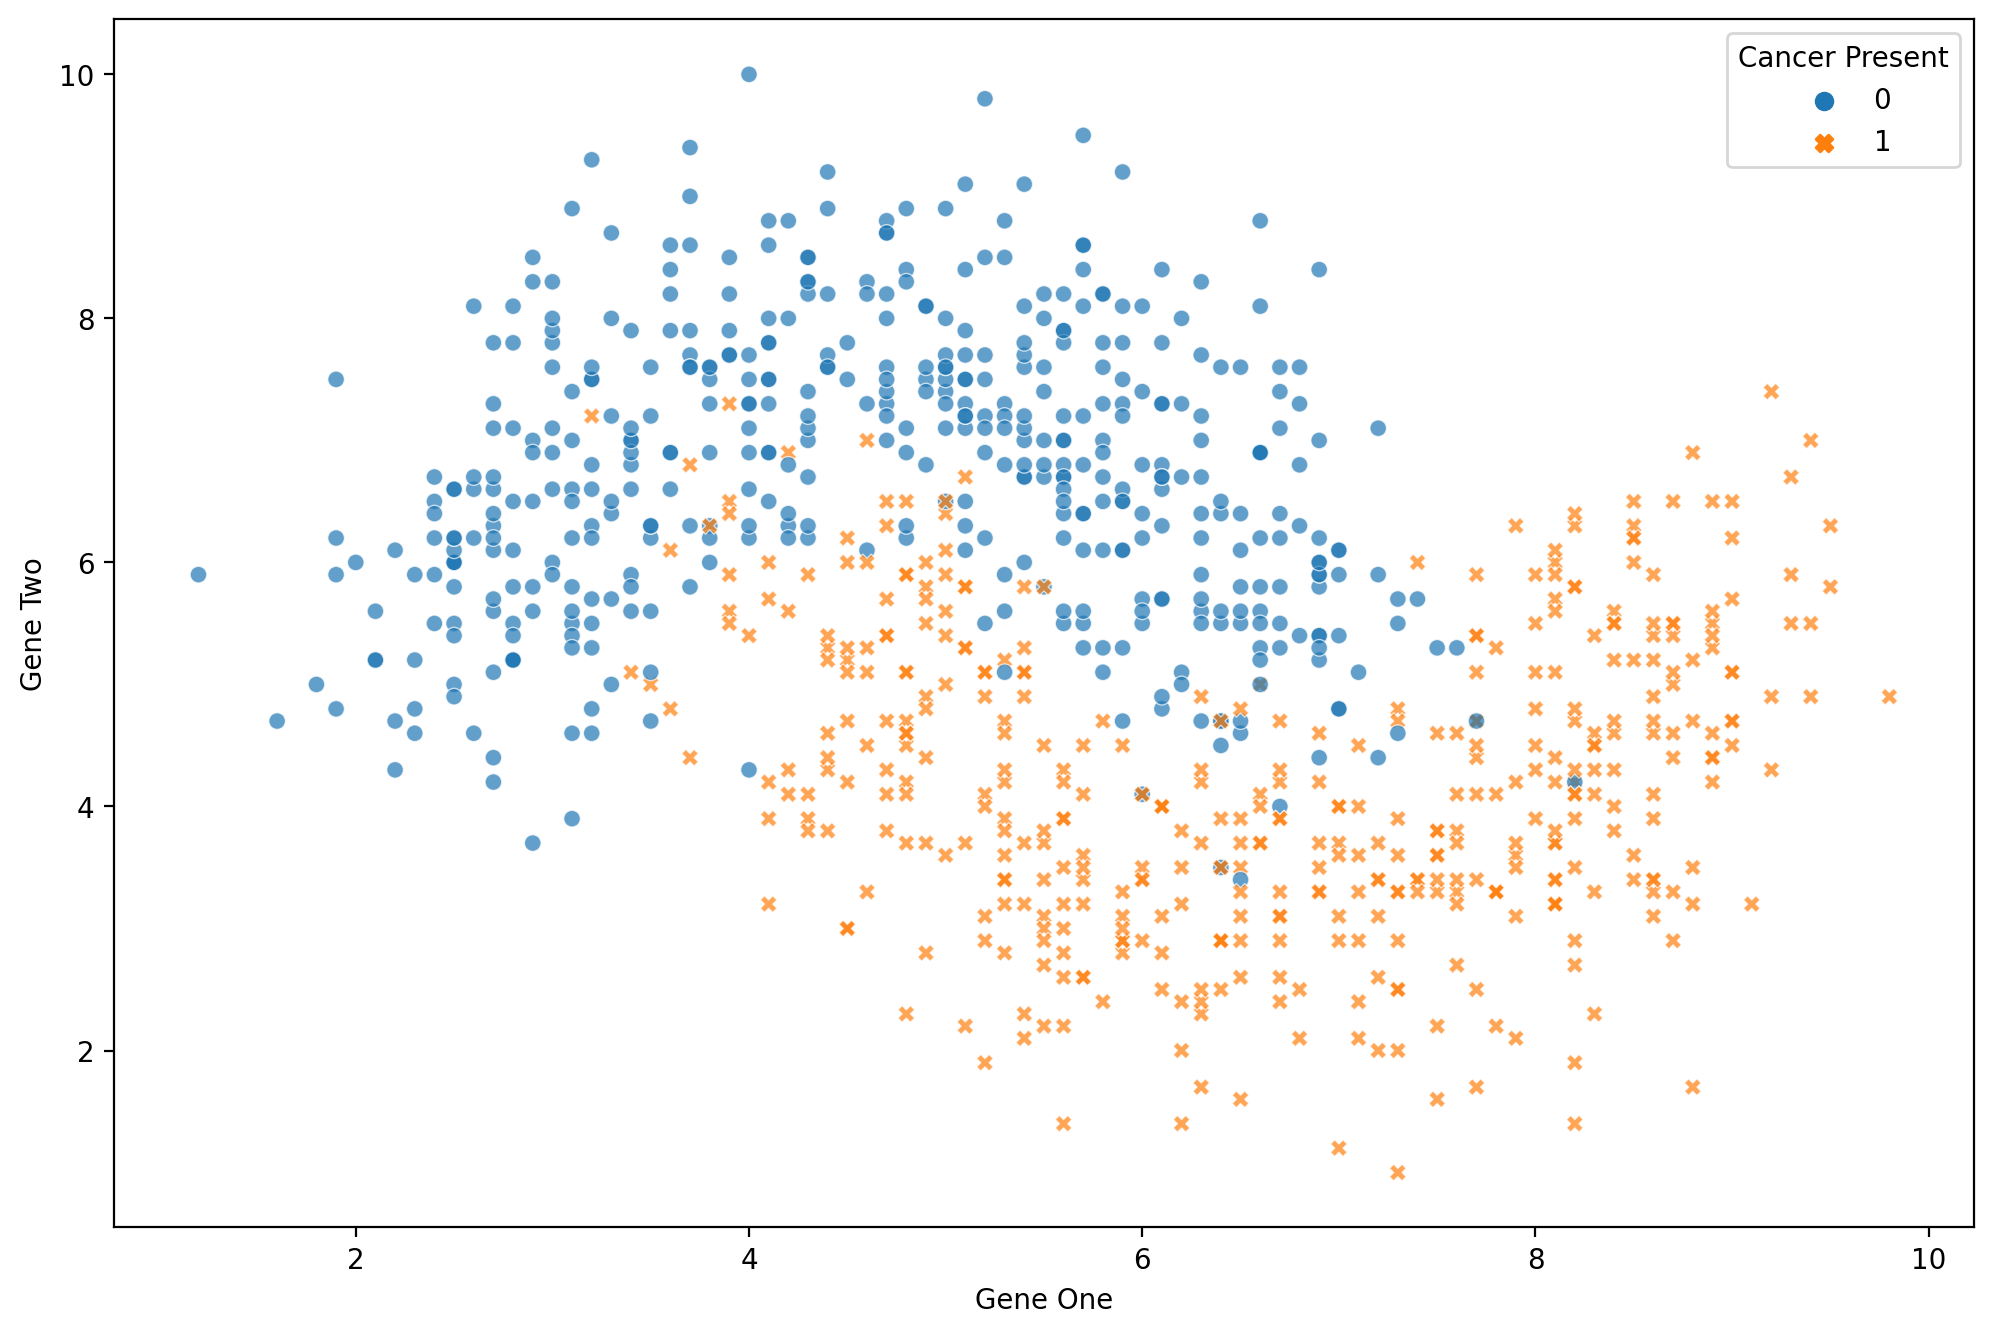

In [21]:
plt.figure(figsize=(12,8) , dpi=200)

sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present', style='Cancer Present',
                data=full_test,alpha=0.7)

## Model Evaluation


In [22]:
y_pred = knn_model.predict(scaled_X_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [24]:
accuracy_score(y_test,y_pred)

0.8922222222222222

In [25]:
confusion_matrix(y_test,y_pred)

array([[420,  50],
       [ 47, 383]], dtype=int64)

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       470
           1       0.88      0.89      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900



# Elbow Method for Choosing Reasonable K Values

**NOTE: This uses the test set for the hyperparameter selection of K.**

In [27]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train) 
   
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

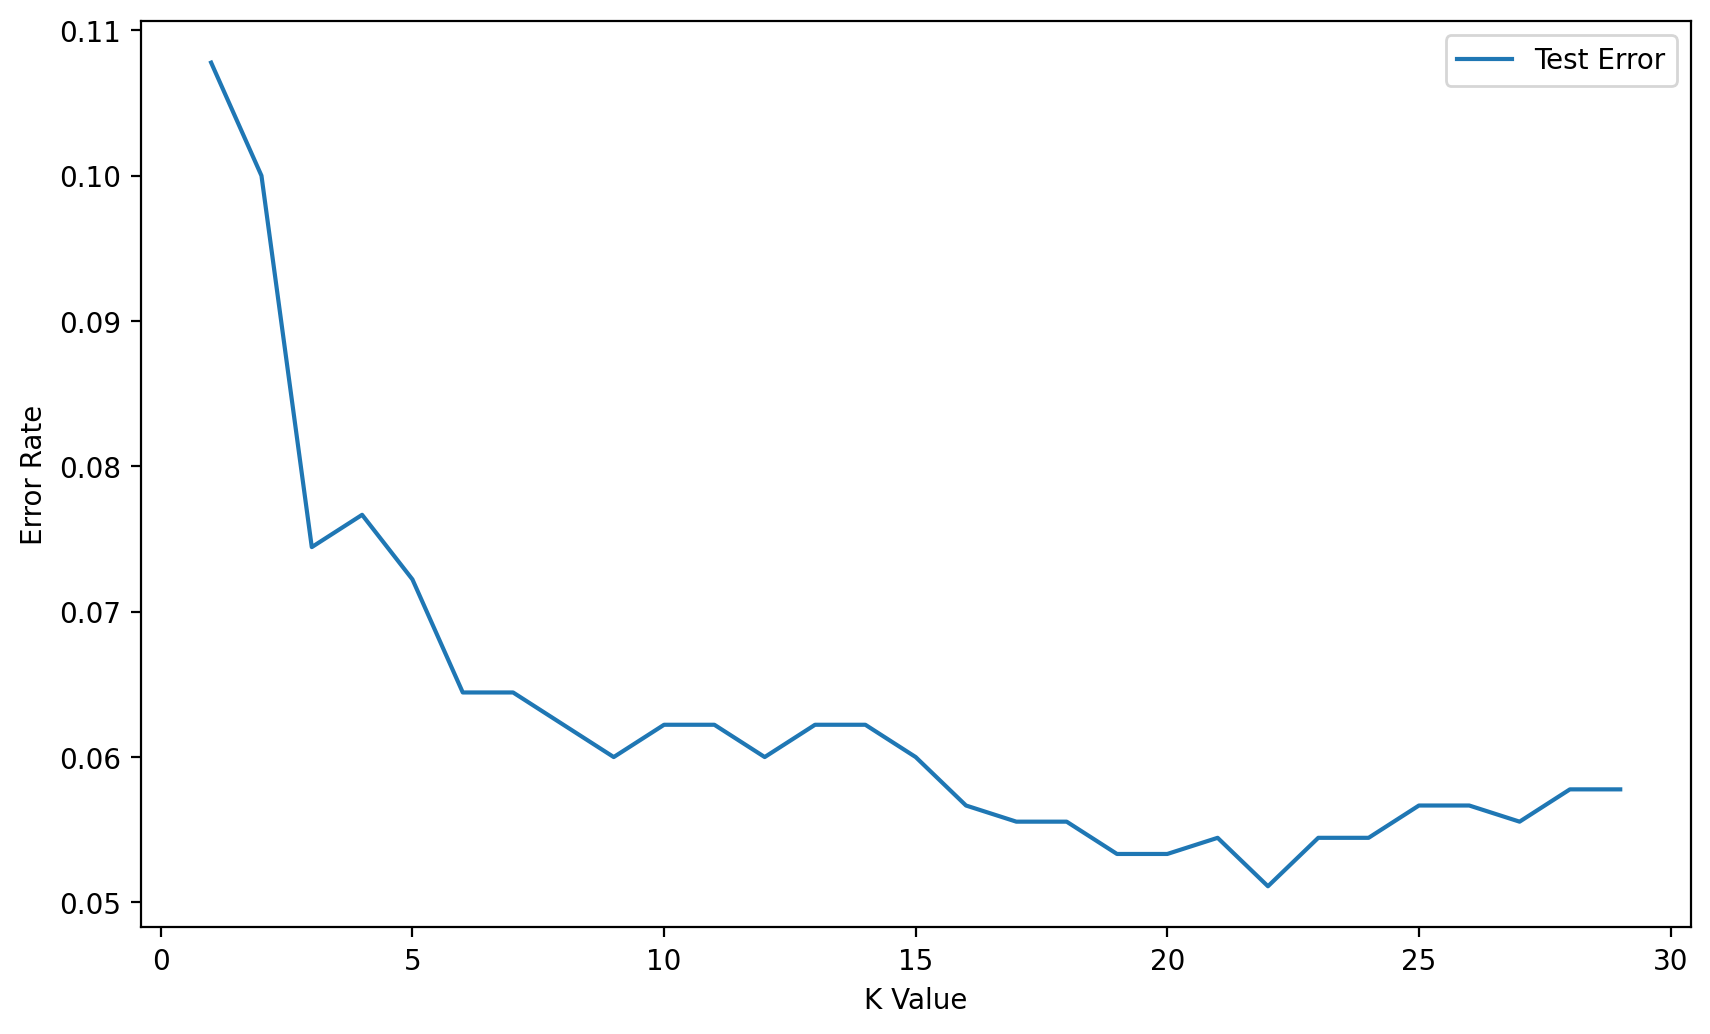

In [28]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

### Creating a Pipeline to find K value

**Follow along very carefully here! We use very specific string codes AND variable names here so that everything matches up correctly. This is not a case where you can easily swap out variable names for whatever you want!**

We'll use a Pipeline object to set up a workflow of operations:

1. Scale Data
2. Create Model on Scaled Data

----
*How does the Scaler work inside a Pipeline with CV? Is scikit-learn "smart" enough to understand .fit() on train vs .transform() on train and test?**

**Yes! Scikit-Learn's pipeline is well suited for this! [Full Info in Documentation](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling) **

When you use the StandardScaler as a step inside a Pipeline then scikit-learn will internally do the job for you.

What happens can be discribed as follows:

* Step 0: The data are split into TRAINING data and TEST data according to the cv parameter that you specified in the GridSearchCV.
* Step 1: the scaler is fitted on the TRAINING data
* Step 2: the scaler transforms TRAINING data
* Step 3: the models are fitted/trained using the transformed TRAINING data
* Step 4: the scaler is used to transform the TEST data
* Step 5: the trained models predict using the transformed TEST data

----

In [29]:
scaler = StandardScaler()

In [30]:
knn = KNeighborsClassifier()

In [31]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [32]:
operations = [('scaler',scaler),('knn',knn)]

In [33]:
from sklearn.pipeline import Pipeline

In [34]:
pipe = Pipeline(operations)

In [35]:
from sklearn.model_selection import GridSearchCV

---
*Note: If your parameter grid is going inside a PipeLine, your parameter name needs to be specified in the following manner:**

* chosen_string_name + **two** underscores + parameter key name
* model_name + __ + parameter name
* knn_model + __ + n_neighbors
* knn_model__n_neighbors

[StackOverflow on this](https://stackoverflow.com/questions/41899132/invalid-parameter-for-sklearn-estimator-pipeline)

The reason we have to do this is because it let's scikit-learn know what operation in the pipeline these parameters are related to (otherwise it might think n_neighbors was a parameter in the scaler).

---

In [36]:
k_values = list(range(1,20))

In [37]:
param_grid = {'knn__n_neighbors': k_values} # as mentioned in the markdown above

In [38]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object.
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either es

In [39]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [40]:
full_cv_classifier.fit(X_train,y_train) # we want a holdout test set; hence train on X_train 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [41]:
full_cv_classifier.best_params_

{'knn__n_neighbors': 14}

In [42]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=14))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=14),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 14,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [43]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.90238095, 0.90285714, 0.91857143, 0.91333333, 0.92380952,
       0.92142857, 0.9252381 , 0.9247619 , 0.9252381 , 0.92190476,
       0.9252381 , 0.9247619 , 0.92761905, 0.92904762, 0.92809524,
       0.92809524, 0.92904762, 0.92857143, 0.92761905])

# Final Model

We just saw that our  GridSearch recommends a K=14 (in line with our alternative Elbow Method). Let's now use the PipeLine again, but this time, no need to do a grid search, instead we will evaluate on our hold-out Test Set.

In [44]:
scaler = StandardScaler()
knn14 = KNeighborsClassifier(n_neighbors=14)
operations = [('scaler',scaler),('knn14',knn14)]

In [45]:
pipe = Pipeline(operations)

In [46]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn14', KNeighborsClassifier(n_neighbors=14))])

In [47]:
pipe_pred = pipe.predict(X_test)

In [48]:
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       470
           1       0.95      0.92      0.93       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [49]:
sample_data_to_test = df.sample(n = 1)

In [50]:
sample_data_to_test

Gene One  Gene Two  Cancer Present
1092       5.1       4.3               1

In [51]:
example = sample_data_to_test.values[:,:-1]

In [52]:
example

array([[5.1, 4.3]])

In [53]:
pipe.predict(example)

array([1], dtype=int64)

# KNN PROJECT


## The Sonar Data 

### Detecting a Rock or a Mine

Sonar (sound navigation ranging) is a technique that uses sound propagation (usually underwater, as in submarine navigation) to navigate, communicate with or detect objects on or under the surface of the water, such as other vessels.

<img src="imgs/sonar.jpg"  style="max-height: 500px; max-width: 500px;">

The data set contains the response metrics for 60 separate sonar frequencies sent out against a known mine field (and known rocks). These frequencies are then labeled with the known object they were beaming the sound at (either a rock or a mine). 

<img src="imgs/mine.jpg"  style="max-height: 500px; max-width: 500px;">

Our main goal is to create a machine learning model capable of detecting the difference between a rock or a mine based on the response of the 60 separate sonar frequencies.


Data Source: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
df = pd.read_csv('DATA\\sonar.all-data.csv')

In [63]:
df.head()

Freq_1  Freq_2  Freq_3  Freq_4  Freq_5  Freq_6  Freq_7  Freq_8  Freq_9  \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

   Freq_10  ...  Freq_52  Freq_53  Freq_54  Freq_55  Freq_56  Freq_57  \
0   0.2111  ...   0.0027   0.0065   0.0159   0.0072   0.0167   0.0180   
1   0.2872  ...   0.0084   0.0089   0.0048   0.0094   0.0191   0.0140   
2   0.6194  ...   0.0232   0.0166   0.0095   0.0180   0.0244   0.0316   
3   0.1264  ...   0.0121   0.0036   0.0150   0.0085   0.0073   0.0050   
4   0.4459  ...   0.0031   0.0054   0.0105   0.0110   0.0015   0.0072   

   Freq_58  Freq_59  Freq_60  Label  
0   0.0084   0.0090   0.0032      R  
1   0.0049   0.0052   0.0044      R  
2   0.0164   0.0095   0.0078      R  
3   0.0044   0.0040   0.0117      R  
4   0.0048   0.0107   0.0094      R  

[5 rows x 61 columns]

In [64]:
len(df)

208

In [65]:
df.columns

Index(['Freq_1', 'Freq_2', 'Freq_3', 'Freq_4', 'Freq_5', 'Freq_6', 'Freq_7',
       'Freq_8', 'Freq_9', 'Freq_10', 'Freq_11', 'Freq_12', 'Freq_13',
       'Freq_14', 'Freq_15', 'Freq_16', 'Freq_17', 'Freq_18', 'Freq_19',
       'Freq_20', 'Freq_21', 'Freq_22', 'Freq_23', 'Freq_24', 'Freq_25',
       'Freq_26', 'Freq_27', 'Freq_28', 'Freq_29', 'Freq_30', 'Freq_31',
       'Freq_32', 'Freq_33', 'Freq_34', 'Freq_35', 'Freq_36', 'Freq_37',
       'Freq_38', 'Freq_39', 'Freq_40', 'Freq_41', 'Freq_42', 'Freq_43',
       'Freq_44', 'Freq_45', 'Freq_46', 'Freq_47', 'Freq_48', 'Freq_49',
       'Freq_50', 'Freq_51', 'Freq_52', 'Freq_53', 'Freq_54', 'Freq_55',
       'Freq_56', 'Freq_57', 'Freq_58', 'Freq_59', 'Freq_60', 'Label'],
      dtype='object')

In [72]:
df['Target'] = df['Label'].map({'R':0,'M':1})

In [80]:
corr_info = np.abs(df.corr()['Target']).sort_values().tail(10)

In [86]:
corr_info

Freq_46    0.305610
Freq_13    0.312811
Freq_9     0.321448
Freq_48    0.329333
Freq_45    0.339406
Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
Target     1.000000
Name: Target, dtype: float64

In [89]:
corr_info.index

Index(['Freq_46', 'Freq_13', 'Freq_9', 'Freq_48', 'Freq_45', 'Freq_10',
       'Freq_49', 'Freq_12', 'Freq_11', 'Target'],
      dtype='object')

<AxesSubplot:>

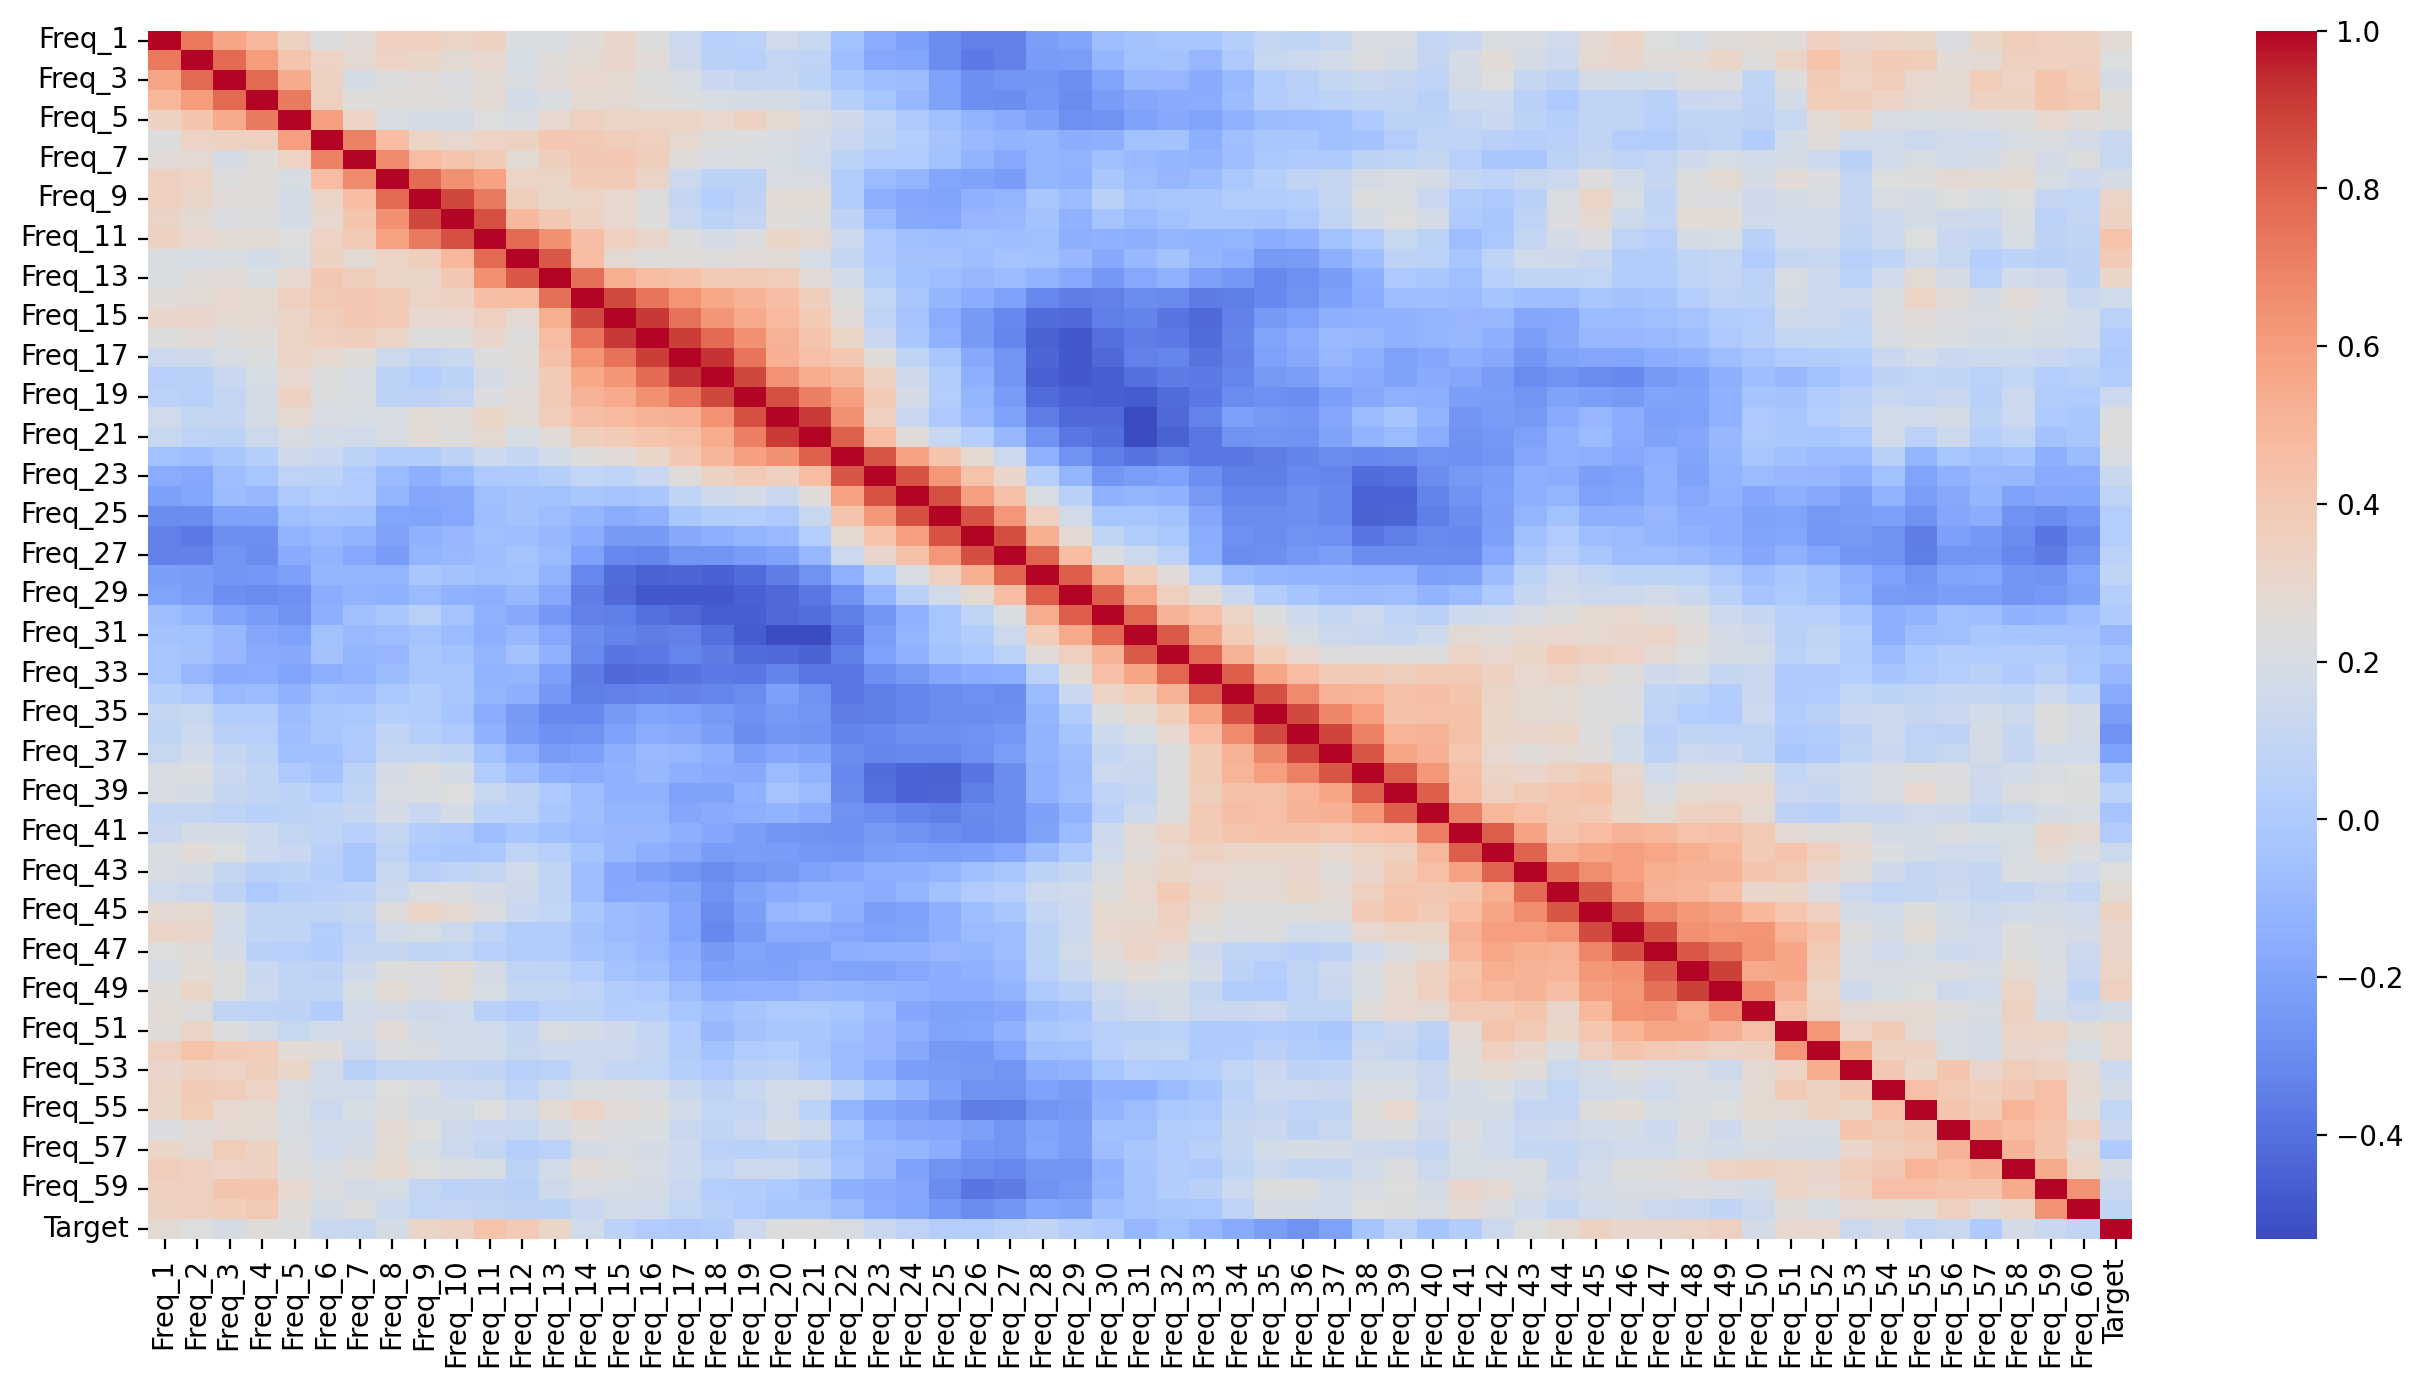

In [77]:
plt.figure(figsize=(16,8) , dpi=200)
sns.heatmap(df.corr(),cmap='coolwarm')

In [78]:
from sklearn.model_selection import train_test_split 

In [79]:
df.head()

Freq_1  Freq_2  Freq_3  Freq_4  Freq_5  Freq_6  Freq_7  Freq_8  Freq_9  \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

   Freq_10  ...  Freq_53  Freq_54  Freq_55  Freq_56  Freq_57  Freq_58  \
0   0.2111  ...   0.0065   0.0159   0.0072   0.0167   0.0180   0.0084   
1   0.2872  ...   0.0089   0.0048   0.0094   0.0191   0.0140   0.0049   
2   0.6194  ...   0.0166   0.0095   0.0180   0.0244   0.0316   0.0164   
3   0.1264  ...   0.0036   0.0150   0.0085   0.0073   0.0050   0.0044   
4   0.4459  ...   0.0054   0.0105   0.0110   0.0015   0.0072   0.0048   

   Freq_59  Freq_60  Label  Target  
0   0.0090   0.0032      R       0  
1   0.0052   0.0044      R       0  
2   0.0095   0.0078      R       0  
3   0.0040   0.0117      R       0  
4   0.0107   0.0094      R       0  

[5 rows x 62 columns]

In [90]:
X = df.drop(['Target','Label'],axis=1)
y = df['Label']

In [91]:
X

Freq_1  Freq_2  Freq_3  Freq_4  Freq_5  Freq_6  Freq_7  Freq_8  Freq_9  \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

     Freq_10  ...  Freq_51  Freq_52  Freq_53  Freq_54  Freq_55  Freq_56  \
0     0.2111  ...   0.0232   0.0027   0.0065   0.0159   0.0072   0.0167   
1     0.2872  ...   0.0125   0.0084   0.0089   0.0048   0.0094   0.0191   
2     0.6194  ...   0.0033   0.0232   0.0166   0.0095   0.0180   0.0244   
3     0.1264  ...   0.0241   0.0121   0.0036   0.0150   0.0085   0.0073   
4     0.4459  ...   0.0156   0.0031   0.0054   0.0105   0.0110   0.0015   
..       ...  ...      ...      ...      ...      ...      ...      ...   
203   0.2684  ...   0.0203   0.0116   0.0098   0.0199   0.0033   0.0101   
204   0.2154  ...   0.0051   0.0061   0.0093   0.0135   0.0063   0.0063   
205   0.2529  ...   0.0155   0.0160   0.0029   0.0051   0.0062   0.0089   
206   0.2354  ...   0.0042   0.0086   0.0046   0.0126   0.0036   0.0035   
207   0.2354  ...   0.0181   0.0146   0.0129   0.0047   0.0039   0.0061   

     Freq_57  Freq_58  Freq_59  Freq_60  
0     0.0180   0.0084   0.0090   0.0032  
1     0.0140   0.0049   0.0052   0.0044  
2     0.0316   0.0164   0.0095   0.0078  
3     0.0050   0.0044   0.0040   0.0117  
4     0.0072   0.0048   0.0107   0.0094  
..       ...      ...      ...      ...  
203   0.0065   0.0115   0.0193   0.0157  
204   0.0034   0.0032   0.0062   0.0067  
205   0.0140   0.0138   0.0077   0.0031  
206   0.0034   0.0079   0.0036   0.0048  
207   0.0040   0.0036   0.0061   0.0115  

[208 rows x 60 columns]

In [92]:
y

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: Label, Length: 208, dtype: object

In [93]:
X_cv, X_test, y_cv, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [96]:
scaler = StandardScaler()
knn = KNeighborsClassifier()
operations = [('scaler',scaler),('knn',knn)]
pipe = Pipeline(operations)

In [97]:
from sklearn.model_selection import GridSearchCV

In [103]:
param_grid = {'knn__n_neighbors':list(range(1,30))}

In [107]:
grid_KNN = GridSearchCV(estimator=pipe, param_grid = param_grid, cv=5,scoring='accuracy')

In [110]:
grid_KNN.fit(X_cv,y_cv)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [111]:
grid_KNN.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [112]:
grid_KNN.cv_results_['mean_test_score']

array([0.84537696, 0.78065434, 0.77524893, 0.75917496, 0.75931721,
       0.74822191, 0.75945946, 0.71664296, 0.7113798 , 0.68421053,
       0.70042674, 0.68435277, 0.68449502, 0.67908962, 0.69530583,
       0.68990043, 0.7113798 , 0.70042674, 0.72204836, 0.67908962,
       0.70071124, 0.69530583, 0.69530583, 0.68463727, 0.68477952,
       0.67923186, 0.67411095, 0.65775249, 0.6685633 ])

Text(0, 0.5, 'Accuracy')

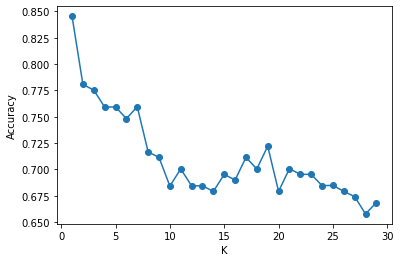

In [114]:
scores = grid_KNN.cv_results_['mean_test_score']
plt.plot(list(range(1,30)),scores,'o-')
plt.xlabel("K")
plt.ylabel("Accuracy")